In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the dataset
df=pd.read_csv('heart.csv')

In [ ]:
# Get the top 5 Records
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Get the bottom 5 Records
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
# Get the number of rows & Columns
df.shape

(918, 12)

In [ ]:
# Get more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Get the list of columns
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Get the Statistical Information about the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Check for Null Values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Check for Duplicate Values
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


## Performing Label Encoding for Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [ ]:
df['Oldpeak'] = le.fit_transform(df['Oldpeak'])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,10,2,0
1,49,0,2,160,180,0,1,156,0,20,1,1
2,37,1,1,130,283,0,2,98,0,10,2,0
3,48,0,0,138,214,0,1,108,1,25,1,1
4,54,1,2,150,195,0,1,122,0,10,2,0


## Outliers

<Axes: >

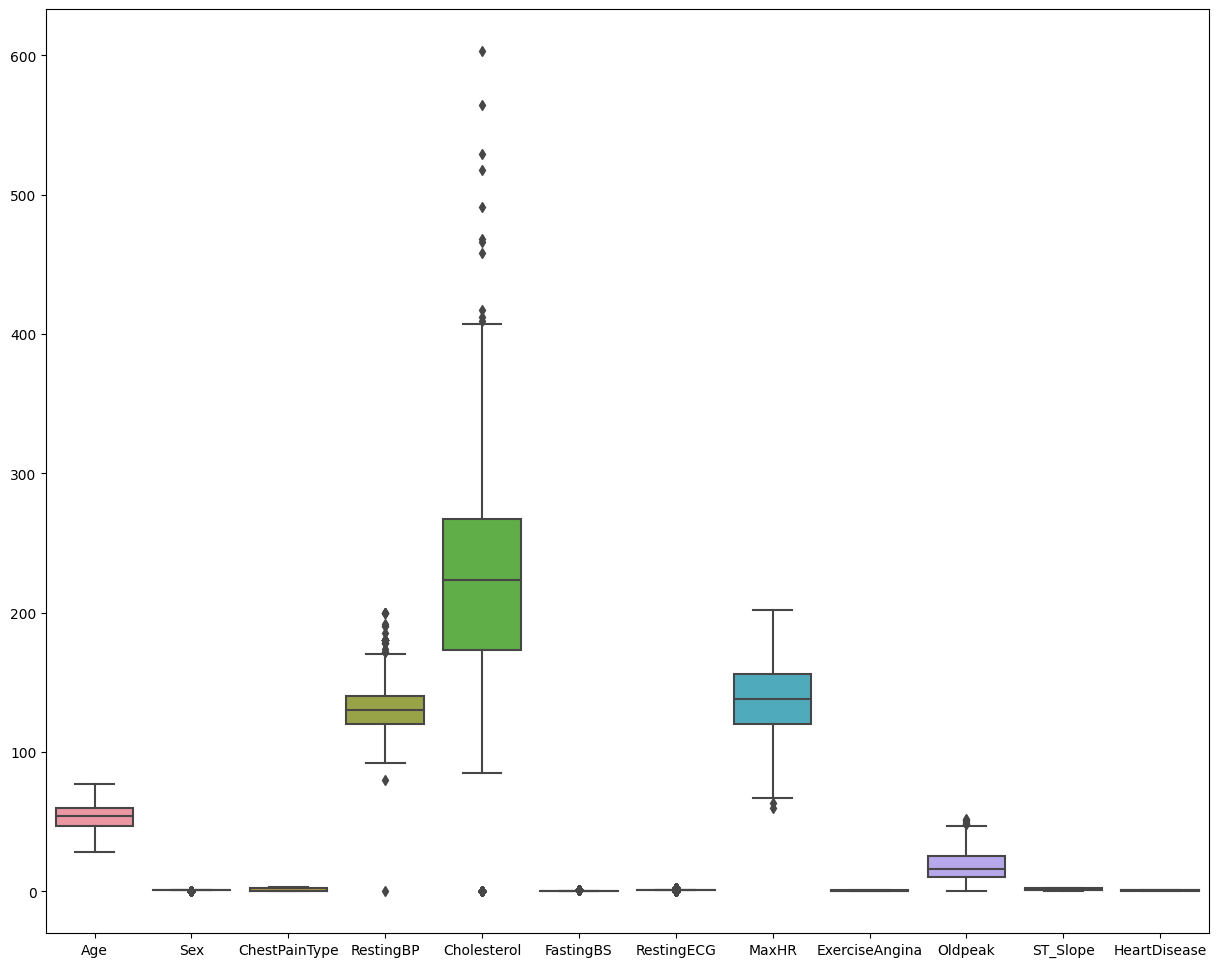

In [ ]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12)) # Set the Width & Height
# df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])
sns.boxplot(data=df[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']])

In [ ]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Age attribute : []
Outliers in Sex attribute : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Outliers in ChestPainType attribute : []
Outliers in RestingBP attribute : [0, 80, 172, 172, 174, 178, 178, 178, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 185, 190, 190, 192, 200, 200, 200, 200]
Outliers in Cholesterol attribute : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Oldpeak']:
    df[i]=handle_outliers(df[i])



<Axes: >

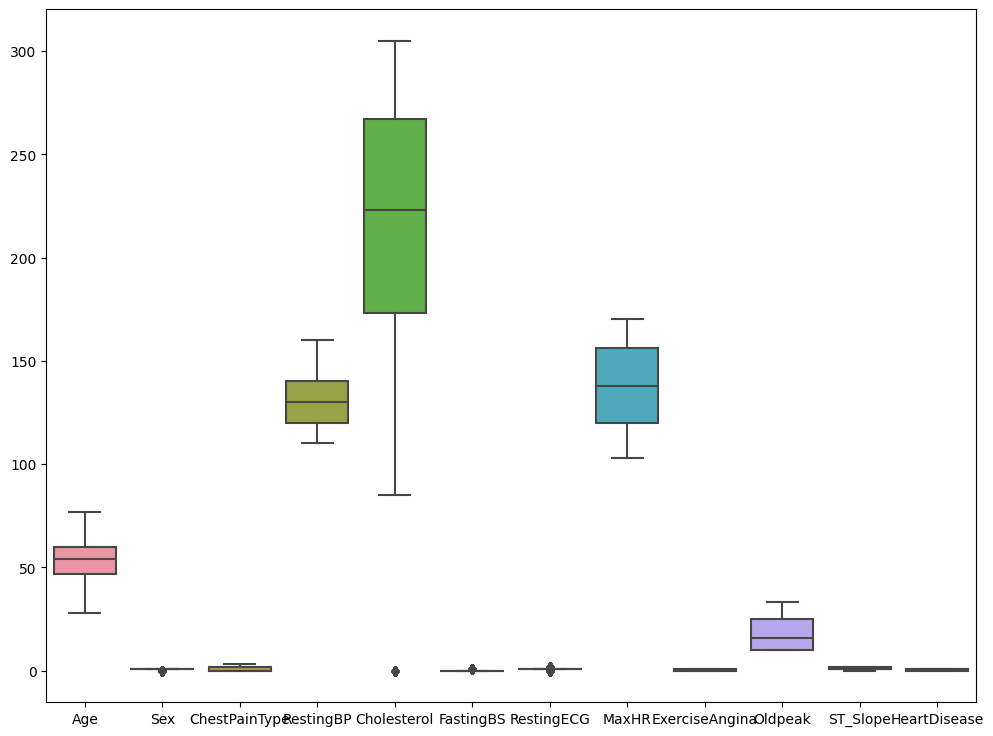

In [ ]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
sns.boxplot(data=df[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']])

# Visualization

In [ ]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0.0,1.0,170.0,0,10.0,2,0


## Univariate Analysis

out of 918 55 % people suffer from heart disease


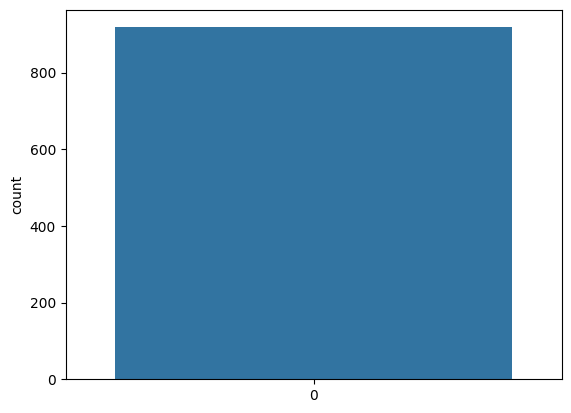

In [ ]:
# Output Column
#countplot is used to displays the count of observations for each category

sns.countplot(df['HeartDisease'])

heart_disease = round (df['HeartDisease'].value_counts().values[0]/918*100)

# Observation
print('out of 918 {} % people suffer from heart disease'.format(heart_disease))

out of 918 79 % people are on the verge of getting a heart disease


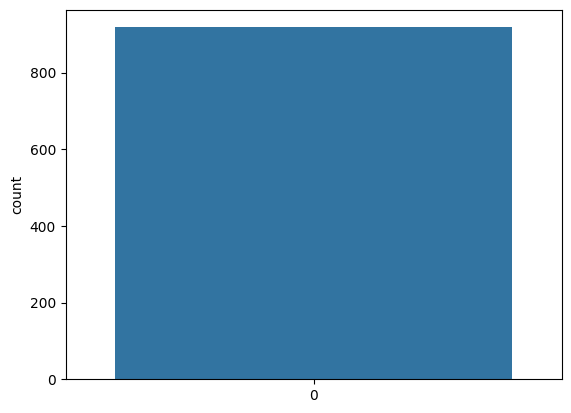

In [ ]:
# Sex Column
sns.countplot(df['Sex'])

gender = round (df['Sex'].value_counts().values[0]/918*100)

# Observation
print('out of 918 {} % people are on the verge of getting a heart disease'.format(gender))

out of 302 19 % patients do not have heart disease
out of 302 12 % patients have heart disease


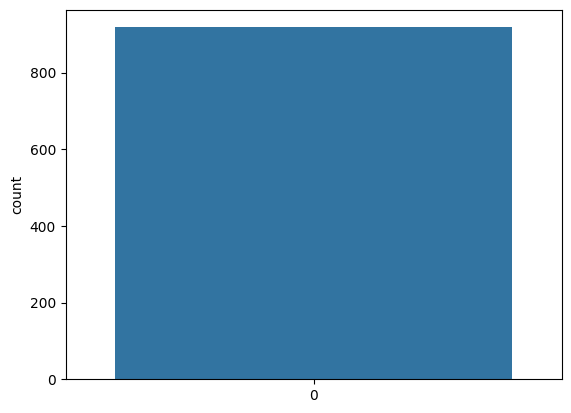

In [ ]:
# cp Column
sns.countplot(df['Cholesterol'])

no_heartdisease = round (df['Cholesterol'].value_counts().values[0]/918*100)
heartdisease = round ((df['Cholesterol'].value_counts().values[1] + df['Cholesterol'].value_counts().values[2]) /918*100)

# Observation
print('out of 302 {} % patients do not have heart disease'.format(no_heartdisease))
print('out of 302 {} % patients have heart disease'.format(heartdisease))

out of 918 60 % patients have High Exercise Angina


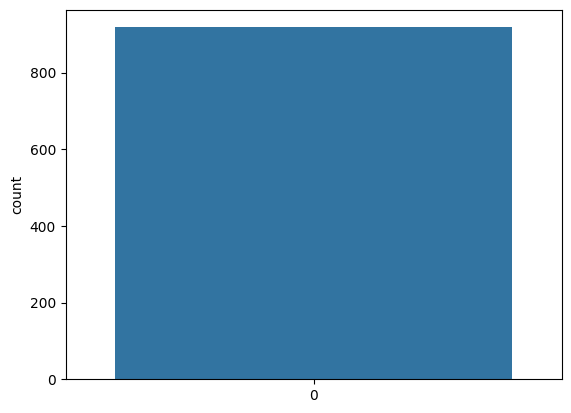

In [ ]:
# fbs Column
sns.countplot(df['ExerciseAngina'])

exercise_angina = round (df['ExerciseAngina'].value_counts().values[0]/918*100)


# Observation
print('out of 918 {} % patients have High Exercise Angina'.format(exercise_angina))


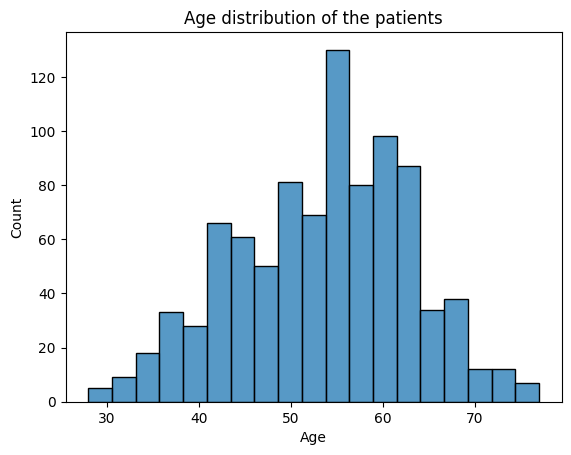

In [ ]:
# A histogram is a graph showing frequency distributions.
# It is a graph showing the number of observations within each given interval.

#Age
sns.histplot(df.Age)
plt.title('Age distribution of the patients')
plt.savefig('Age.png')
plt.show()

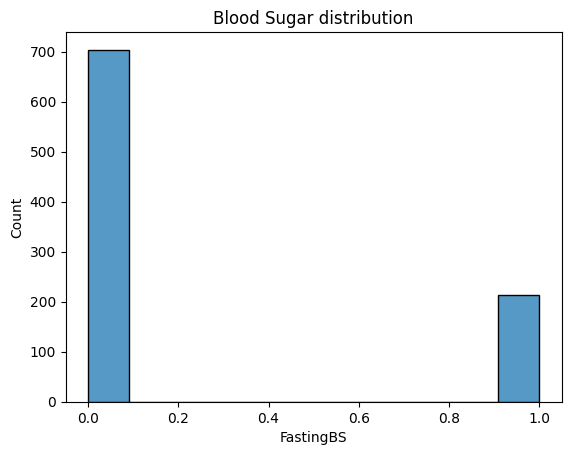

In [ ]:
#Resting blood pressure
sns.histplot(df.FastingBS)
plt.title('Blood Sugar distribution')
plt.show()

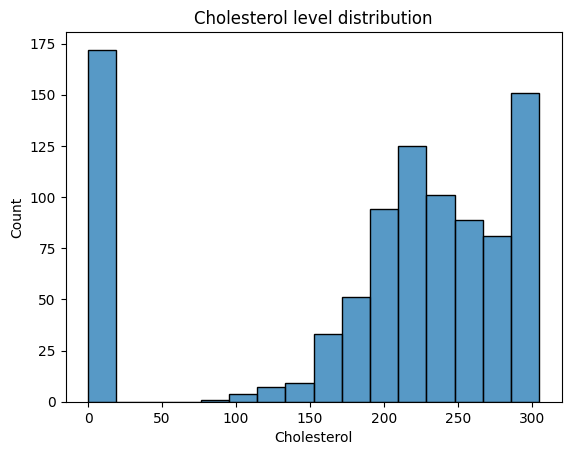

In [ ]:
#Cholesterol
sns.histplot(df.Cholesterol)
plt.title('Cholesterol level distribution')
plt.show()

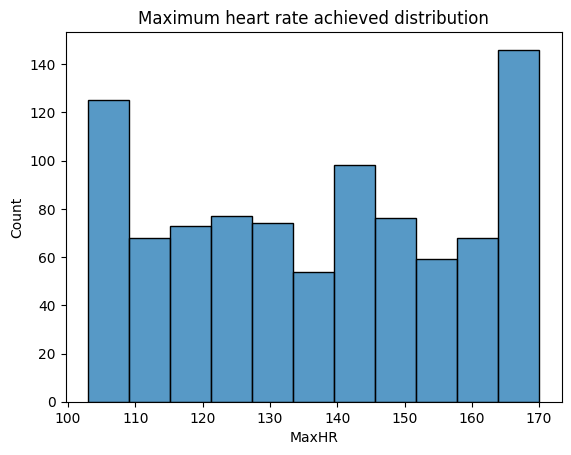

In [ ]:
#Maximum heart rate achieved
sns.histplot(df.MaxHR)
plt.title('Maximum heart rate achieved distribution')
plt.show()

## Bivariate Analysis

<Axes: xlabel='Sex', ylabel='ExerciseAngina'>

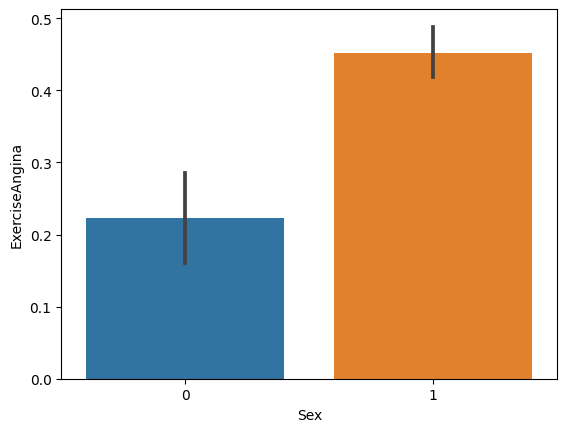

In [ ]:
# Barplot is useful for comparing the mean value of a numerical variable across different categories
sns.barplot(x='Sex',y='ExerciseAngina',data=df)

<Axes: xlabel='Age', ylabel='MaxHR'>

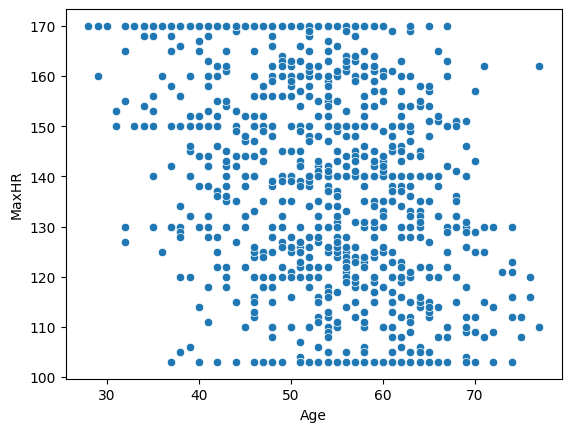

In [ ]:
#Create Scatterplot
# It is used to obtain the correlational relationship between two numerical variables.
sns.scatterplot(x='Age',y='MaxHR',data=df)

# Correlation
It is used to find how strong a relationship is between two variable, its Value lies in (-1 to 1)

Text(0.5, 1.0, 'Correlation map')

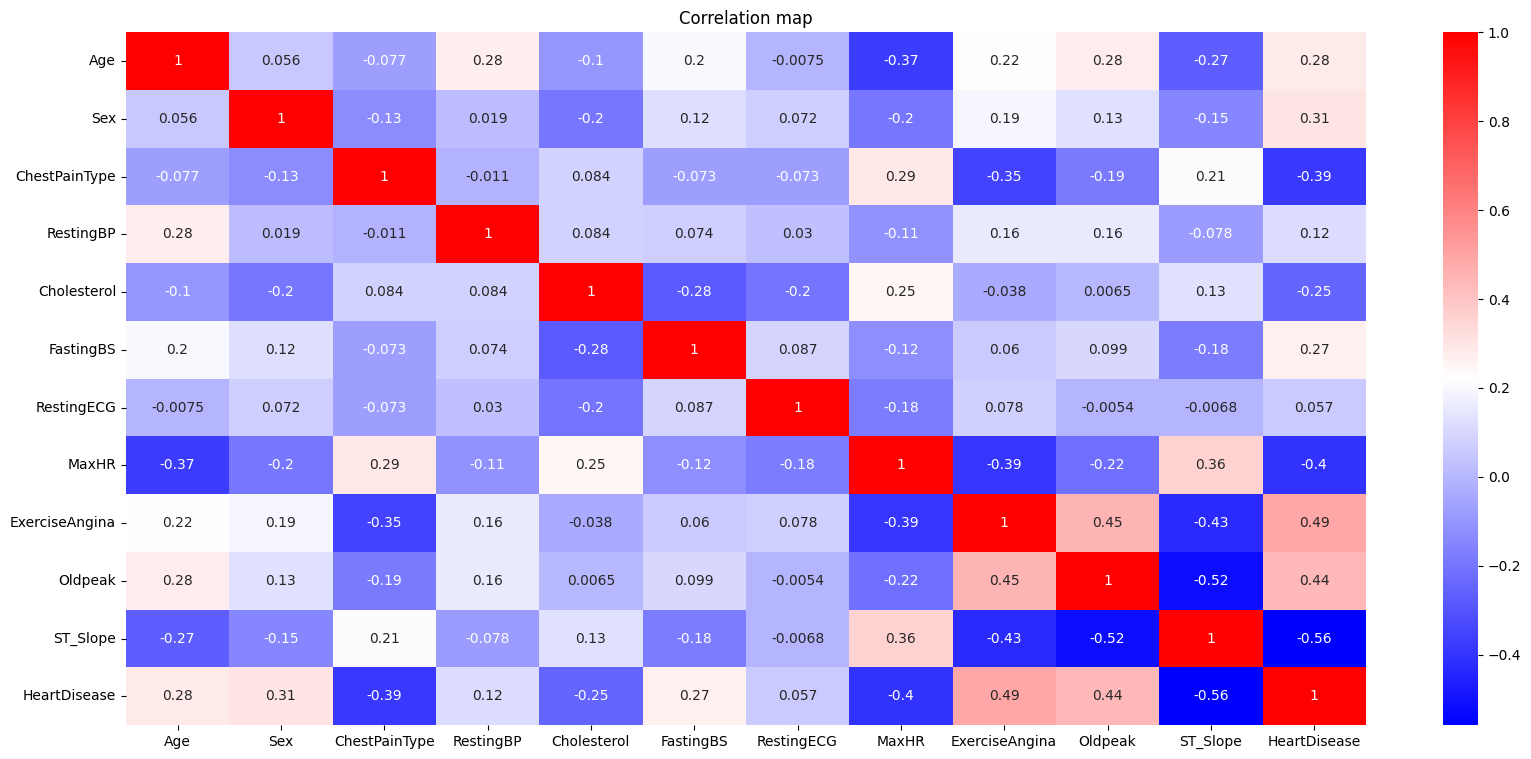

In [ ]:
# Heatmap is use to display correlation between different variable
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

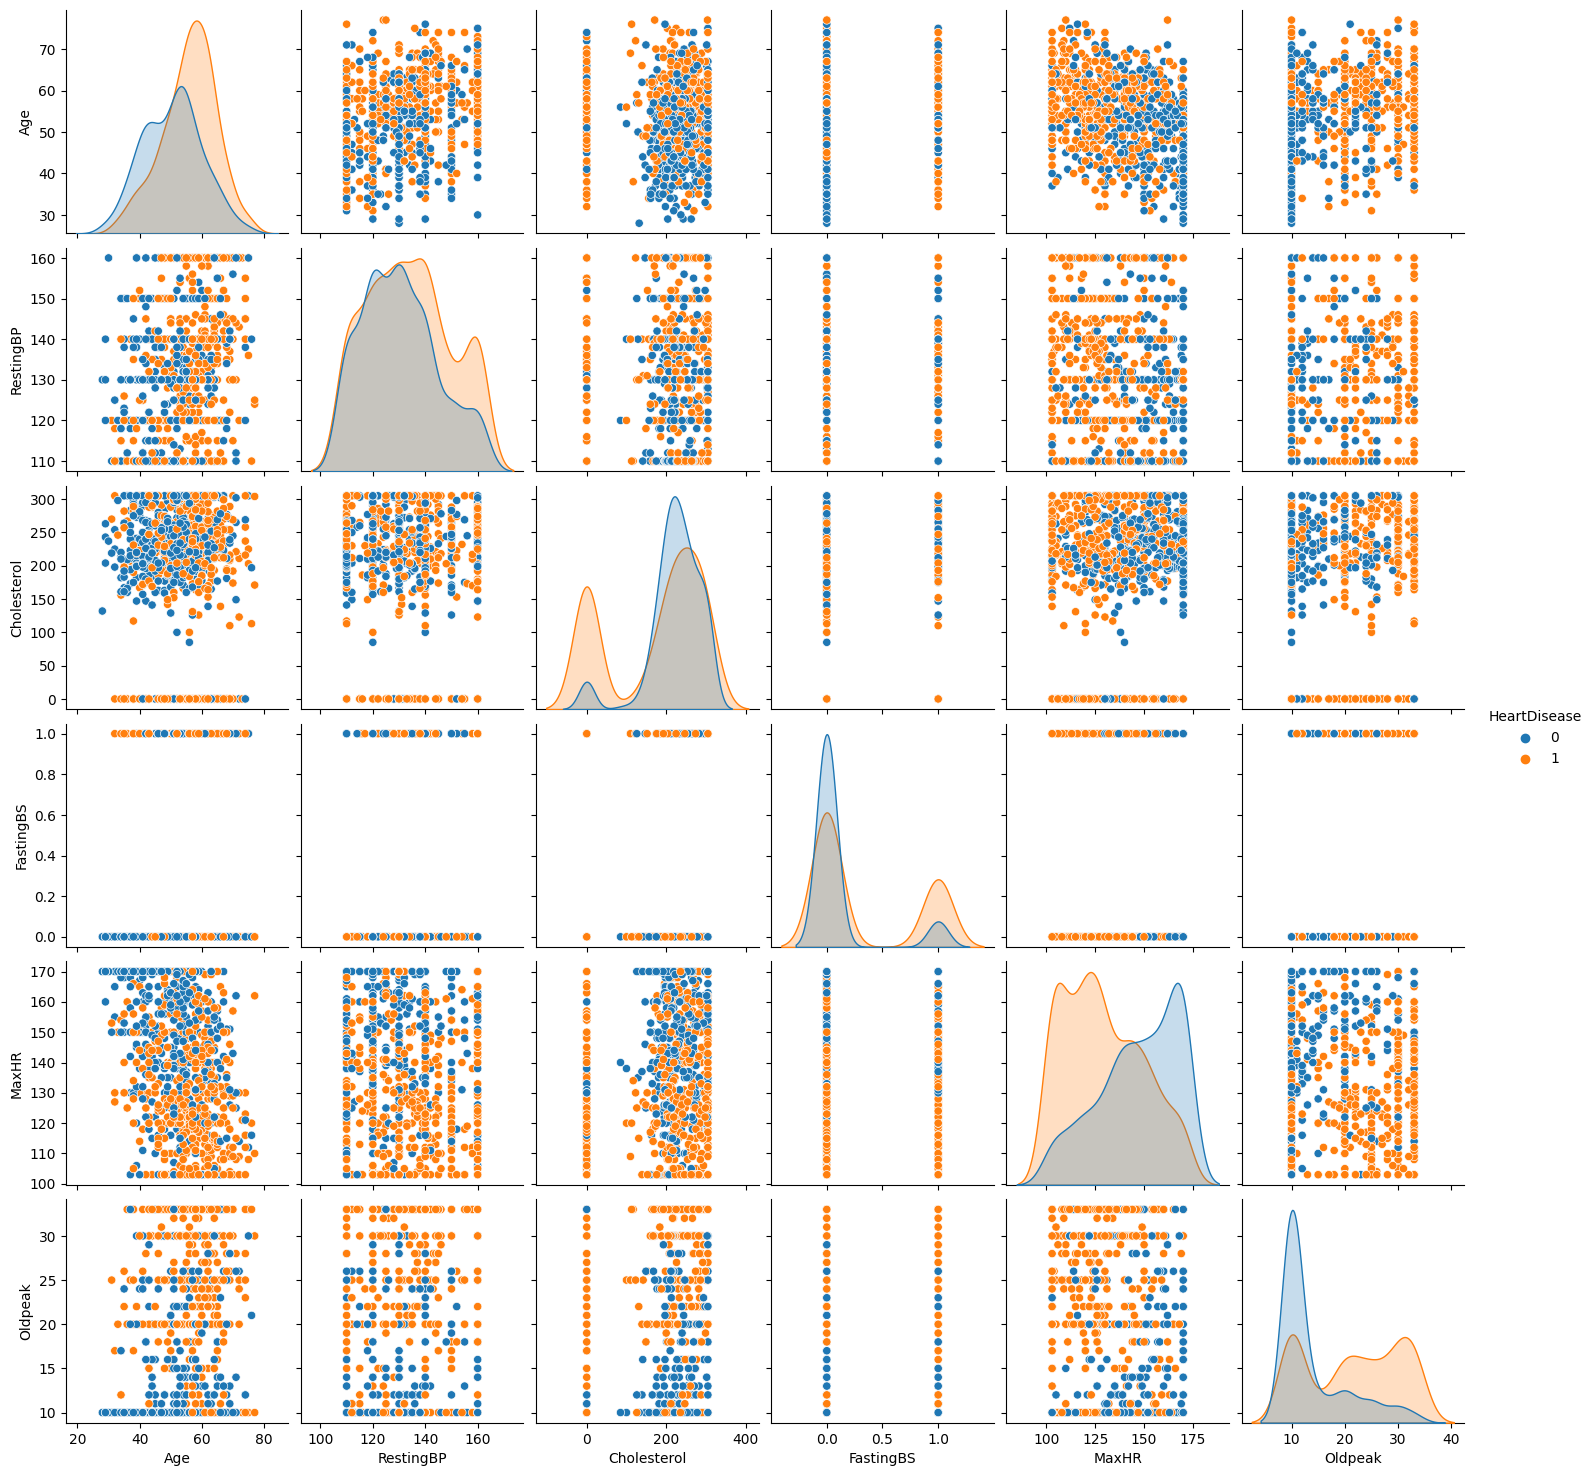

In [ ]:
# It is use to plot pairwise relationships between variables within a dataset.
# it is applicable to numeric columns only.

sns.pairplot(df[['Age','RestingBP','Cholesterol','FastingBS', 'MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease')   #name of dependent variable

# Feature Scaling

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0.0,1.0,170.0,0,10.0,2,0
1,49,0,2,160.0,180.0,0.0,1.0,156.0,0,20.0,1,1
2,37,1,1,130.0,283.0,0.0,2.0,103.0,0,10.0,2,0
3,48,0,0,138.0,214.0,0.0,1.0,108.0,1,25.0,1,1
4,54,1,2,150.0,195.0,0.0,1.0,122.0,0,10.0,2,0


In [ ]:
from sklearn.preprocessing import StandardScaler  # Standarization
from sklearn.preprocessing import MinMaxScaler  # Normalization

scale = StandardScaler()
mms = MinMaxScaler()
# scale = MinMaxScaler()
df[['Age','RestingBP','Cholesterol', 'MaxHR']]=scale.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR']])
df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.514825,0.931709,0.0,1.0,1.501059,0,0.000000,2,0
1,-0.478484,0,2,1.834042,-0.138667,0.0,1.0,0.862581,0,0.434783,1,1
2,-1.751359,1,1,-0.144783,0.872789,0.0,2.0,-1.554514,0,0.000000,2,0
3,-0.584556,0,0,0.382903,0.195212,0.0,1.0,-1.326486,1,0.652174,1,1
4,0.051881,1,2,1.174434,0.008633,0.0,1.0,-0.688008,0,0.000000,2,0


# Data Preparation

In [ ]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [ ]:
# #split dataset in features and target variable

# feature_cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
# X = df[feature_cols]
# y = df.HeartDisease # Target variable

In [ ]:
# y

In [ ]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [ ]:
X_train.shape

(734, 11)

In [ ]:
X_test.shape

(184, 11)

Here splitting the dataset into train set and test set with the size of 80% and 20%

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
my_first_model = LinearRegression()

In [ ]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
my_first_model.coef_

array([ 0.01540382,  0.14777441, -0.11089537,  0.02070015, -0.05777917,
        0.174197  , -0.0353821 , -0.03434178,  0.18157514,  0.13807253,
       -0.22159943])

In [ ]:
my_first_model.intercept_

0.6911656746779666

In [ ]:
Pred = my_first_model.predict(X_test)

In [ ]:
Pred

array([ 0.42603288,  0.62765082,  1.06791666,  0.6356292 ,  1.0944394 ,
       -0.06463363,  1.29478842,  0.87284813,  0.94239098,  0.18464545,
       -0.23181183,  0.88953618,  0.76230833,  0.58934832,  1.09362698,
        0.66439057,  0.97192262,  0.69967112,  0.4943752 ,  0.82126455,
        0.04179019,  1.13804617,  0.90868024, -0.03460537,  0.25201039,
       -0.04698509,  0.42522757,  0.51830221,  0.259447  ,  0.68423088,
        0.24183955,  0.66684978,  1.15497105,  0.76826181,  0.30960835,
        0.03830654,  1.09165014,  0.01696136,  0.4737608 ,  0.76490955,
        0.65743895,  0.33018763,  1.37678696,  0.15237032,  0.25667519,
        0.8048283 ,  0.86404364,  0.74152607,  0.20648039, -0.01643134,
        0.19110306,  0.25600753,  0.26395057,  0.21790835,  0.08407124,
        0.44421255,  0.92149747,  0.47038979,  0.86746654,  0.92222175,
        0.1035841 ,  0.88576939,  1.01595079,  0.18616008,  0.8020062 ,
        0.09307813,  0.45668476,  0.48672485,  0.57153099,  0.31

In [ ]:
y_test

636    0
221    1
349    1
351    1
907    1
      ..
372    1
466    1
404    1
266    1
741    1
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Evaluation on Train Data

In [ ]:
my_linear_preds_train = my_first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 0.27402387289244706
MSE on Train Data : 0.122368928596857
RMSE on Train Data : 0.34981270502492756
R-squared on Train Data : 0.5060316302888548


### Evaluation on Test Data

In [ ]:
my_model_preds = my_first_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', my_first_model.score(X_test, y_test))

MAE on Train Data : 0.26129906952318827
MSE on Train Data : 0.11300058744239051
RMSE on Train Data : 0.33615560004615497
R-squared on Train Data : 0.5372825485668151


### Multiple Linear Regression

In [ ]:

feature_cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
x = df[feature_cols] # Features
y = df.HeartDisease # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 12)
(230, 12)
(688,)
(230,)


In [ ]:
my_multiple_linear_model = LinearRegression()

In [ ]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
my_multiple_linear_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.87350135e-16,  6.93889390e-17,
        6.24500451e-17, -2.56739074e-16, -5.20417043e-18,  5.55111512e-17,
       -1.73472348e-16,  3.46944695e-17,  4.30211422e-16,  1.00000000e+00])

In [ ]:
my_multiple_linear_model.intercept_

-1.2212453270876722e-15

In [ ]:
Pred1 = my_multiple_linear_model.predict(X_test)

In [ ]:
Pred1

array([ 1.00000000e+00,  1.00000000e+00, -1.96158609e-16,  1.00000000e+00,
       -3.15796813e-16,  1.00000000e+00, -1.23393693e-16, -4.95084929e-16,
        1.00000000e+00,  1.00000000e+00, -1.37706157e-16,  1.00000000e+00,
        1.00000000e+00, -1.40023650e-16,  1.00000000e+00,  1.00000000e+00,
       -7.66586205e-17,  1.00000000e+00,  1.23355351e-16, -9.95115856e-17,
        1.00000000e+00,  1.00000000e+00, -1.01430729e-16, -7.25414404e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -2.31806101e-16, -7.34291274e-17, -1.78980600e-16, -1.97124518e-16,
       -4.35456722e-16,  2.00923841e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -5.46264414e-17,  1.00000000e+00,  1.00000000e+00, -2.26670272e-16,
       -7.61476894e-16,  1.00000000e+00, -1.43830138e-16, -2.63952918e-16,
        1.00000000e+00, -1.75775451e-16, -1.34488848e-16, -2.27692031e-16,
        1.00000000e+00, -

In [ ]:
y_test

242    1
441    1
260    0
546    1
847    0
      ..
829    0
100    1
571    1
80     0
12     0
Name: HeartDisease, Length: 230, dtype: int64

### Evaluation on Train data

In [ ]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))


MAE on Train Data : 3.011568971797839e-16
MSE on Train Data : 1.8111619498433787e-31
RMSE on Train Data : 4.255774841134548e-16
R-squared on Train Data : 1.0


### Evaluation on Test Data

In [ ]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))


MAE on Train Data : 3.2267580543676597e-16
MSE on Train Data : 1.8480209687374275e-31
RMSE on Train Data : 4.2988614408206126e-16
R-squared on Train Data : 1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((688, 11), (230, 11), (688,), (230,))

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((688, 11), (230, 11), (688,), (230,))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
y_test

900    1
570    1
791    1
189    1
372    1
      ..
880    0
110    0
120    1
306    1
889    1
Name: HeartDisease, Length: 230, dtype: int64

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8826086956521739

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 77,  12],
       [ 15, 126]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        89
           1       0.91      0.89      0.90       141

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        74
           1       0.90      0.77      0.83       110

    accuracy                           0.82       184
   macro avg       0.81      0.83      0.81       184
weighted avg       0.83      0.82      0.82       184



DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.0826075 , 0.02887917, 0.07040879, 0.05753518, 0.13419835,
       0.00769667, 0.00993071, 0.13361756, 0.0474403 , 0.0787353 ,
       0.34895045])

## Hyperparameter Tunning

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        74
           1       0.90      0.77      0.83       110

    accuracy                           0.82       184
   macro avg       0.81      0.83      0.81       184
weighted avg       0.83      0.82      0.82       184



DecisionTreeClassifier(max_depth=10)

In [ ]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(X_train,y_train)
    ypred=dt2.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,ypred)}")

1: 0.8858695652173914
2: 0.8315217391304348
3: 0.8641304347826086
4: 0.875
5: 0.8858695652173914
6: 0.8260869565217391
7: 0.8260869565217391
8: 0.8206521739130435
9: 0.8260869565217391
10: 0.8369565217391305
11: 0.8097826086956522
12: 0.7989130434782609
13: 0.8043478260869565
14: 0.782608695652174
15: 0.8152173913043478
16: 0.8043478260869565
17: 0.7989130434782609
18: 0.7934782608695652
19: 0.7880434782608695
20: 0.7989130434782609
21: 0.7934782608695652
22: 0.7989130434782609
23: 0.8043478260869565
24: 0.7989130434782609
25: 0.7771739130434783
26: 0.7989130434782609
27: 0.8043478260869565
28: 0.7880434782608695
29: 0.8097826086956522
30: 0.8043478260869565
31: 0.8043478260869565
32: 0.7934782608695652
33: 0.7934782608695652
34: 0.8260869565217391
35: 0.8097826086956522
36: 0.7989130434782609
37: 0.7934782608695652
38: 0.7989130434782609
39: 0.8206521739130435
40: 0.8206521739130435
41: 0.8043478260869565
42: 0.8097826086956522
43: 0.8097826086956522
44: 0.7934782608695652
45: 0.79891

In [ ]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        74
           1       0.90      0.77      0.83       110

    accuracy                           0.82       184
   macro avg       0.81      0.83      0.81       184
weighted avg       0.83      0.82      0.82       184



DecisionTreeClassifier(max_depth=11)

In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        74
           1       0.90      0.77      0.83       110

    accuracy                           0.82       184
   macro avg       0.81      0.83      0.81       184
weighted avg       0.83      0.82      0.82       184



DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    print(f"{i}: {accuracy_score(y_test,y_pred)}")


1: 0.782608695652174
2: 0.7989130434782609
3: 0.8097826086956522
4: 0.8478260869565217
5: 0.8260869565217391
6: 0.8586956521739131
7: 0.8532608695652174
8: 0.8260869565217391
9: 0.8369565217391305
10: 0.8315217391304348
11: 0.8315217391304348
12: 0.8260869565217391
13: 0.8315217391304348
14: 0.8315217391304348
15: 0.8641304347826086
16: 0.8641304347826086
17: 0.8641304347826086
18: 0.8641304347826086
19: 0.8695652173913043
20: 0.8586956521739131
21: 0.8586956521739131
22: 0.875
23: 0.875
24: 0.8804347826086957
25: 0.875
26: 0.8804347826086957
27: 0.8695652173913043
28: 0.8695652173913043
29: 0.8804347826086957
30: 0.8804347826086957
31: 0.8804347826086957
32: 0.8804347826086957
33: 0.875
34: 0.875
35: 0.8532608695652174
36: 0.8532608695652174
37: 0.8315217391304348
38: 0.8315217391304348
39: 0.8315217391304348
40: 0.8315217391304348
41: 0.8315217391304348
42: 0.8315217391304348
43: 0.8260869565217391
44: 0.8260869565217391
45: 0.8260869565217391
46: 0.8260869565217391
47: 0.82608695652

In [ ]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=41)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.91      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



DecisionTreeClassifier(min_samples_leaf=41)

In [ ]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=100,max_depth=3)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.91      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=100)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(dt7,filled=True,feature_names=x.columns)

AttributeError: ignored

<Figure size 2500x2000 with 0 Axes>

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}

In [ ]:
my_best_preds = grid_search.predict(X_test)

In [ ]:
accuracy_score(y_test, my_best_preds)

0.8641304347826086

In [ ]:
print(classification_report(y_test, my_best_preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        74
           1       0.88      0.89      0.89       110

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100, random_state=40)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8967391304347826
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        74
           1       0.91      0.92      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



## KNN

In [ ]:
X=df.iloc[:, :-1]
print (df.shape)
print (X.shape)

y = df.iloc[:,-1]

(918, 12)
(918, 11)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[65 14]
 [13 92]]


In [ ]:
print(accuracy_score(y_test,pred))

0.8532608695652174


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83        79
           1       0.87      0.88      0.87       105

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [ ]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy_rate.append(score)


In [ ]:
accuracy_rate

[0.8043478260869565,
 0.7663043478260869,
 0.8532608695652174,
 0.8152173913043478,
 0.842391304347826,
 0.842391304347826,
 0.8586956521739131,
 0.8478260869565217,
 0.8478260869565217,
 0.8532608695652174,
 0.8532608695652174,
 0.842391304347826,
 0.8478260869565217,
 0.8315217391304348,
 0.842391304347826,
 0.842391304347826,
 0.842391304347826,
 0.842391304347826,
 0.8369565217391305,
 0.8369565217391305,
 0.8315217391304348,
 0.8260869565217391,
 0.8260869565217391,
 0.8260869565217391,
 0.8260869565217391,
 0.8206521739130435,
 0.8260869565217391,
 0.8206521739130435,
 0.8315217391304348,
 0.8315217391304348,
 0.8315217391304348,
 0.8260869565217391,
 0.8315217391304348,
 0.8206521739130435,
 0.8315217391304348,
 0.8260869565217391,
 0.8260869565217391,
 0.8206521739130435,
 0.8206521739130435]

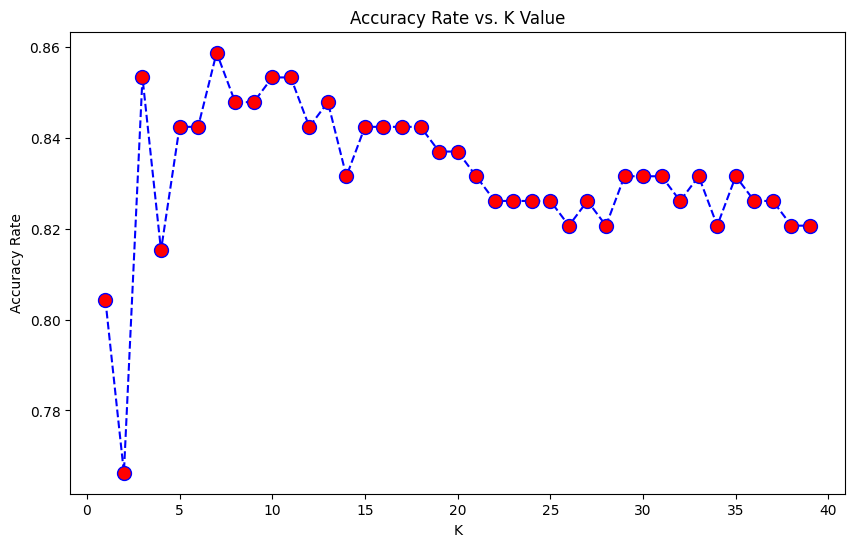

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[69 10]
 [33 72]]


0.7663043478260869


In [ ]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=21


[[66 13]
 [18 87]]


0.8315217391304348


## Naive Bayes

In [ ]:
# from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()

# model.fit(X_train, y_train);

In [ ]:
# from sklearn.metrics import (
#     accuracy_score,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
#     f1_score,
#     classification_report,
# )

# y_pred = model.predict(X_test)

# accuray = accuracy_score(y_pred, y_test)
# f1 = f1_score(y_pred, y_test, average="weighted")

# print("Accuracy:", accuray)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB  #for multiclass

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [ ]:
def mymodel(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

In [ ]:
NB_model_B = BernoulliNB()

In [ ]:
mymodel(NB_model_B)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        79
           1       0.88      0.84      0.86       105

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



BernoulliNB()

In [ ]:
NB_model_G= GaussianNB()

In [ ]:
mymodel(NB_model_G)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        79
           1       0.88      0.84      0.86       105

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



GaussianNB()

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "Naive_Bayes.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(NB_model_G, file)

In [ ]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

# evaluate model
y_predict = model.predict(X_test)

# check results
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        79
           1       0.88      0.84      0.86       105

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



## SVM

In [ ]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
y_train

41     1
891    0
265    0
177    0
241    1
      ..
767    0
72     1
908    1
235    0
37     0
Name: HeartDisease, Length: 688, dtype: int64

## Linear

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8739130434782608

## RBF

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8608695652173913

## Sigmoid

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7347826086956522

## Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8608695652173913

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)


In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
279,0.051881,0,1,-0.144783,0.578190,0.0,2.0,0.816976,0,0.000000,2
451,1.112610,1,0,0.778668,-1.906260,0.0,2.0,-0.688008,1,0.434783,1
39,-0.584556,0,0,1.174434,0.322871,0.0,1.0,-0.323164,1,0.434783,1
557,0.264027,1,2,0.316943,0.136292,1.0,2.0,-0.688008,1,0.782609,1
548,1.324756,1,0,-1.332078,0.656750,0.0,1.0,0.132892,0,0.652174,2
...,...,...,...,...,...,...,...,...,...,...,...
835,0.051881,1,0,-1.464000,0.440711,0.0,1.0,-0.505586,1,1.000000,1
192,-0.584556,1,1,-0.144783,0.499631,0.0,1.0,1.045003,0,0.000000,2
629,0.370100,0,0,-0.276705,1.069188,0.0,0.0,0.999398,0,0.000000,2
559,1.112610,1,0,0.119060,0.774589,0.0,1.0,-1.554514,1,1.000000,0


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Sex', y='Age', z='RestingECG')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Sex', y='ChestPainType', z='RestingECG')
fig.show()

## Adaboost